In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module=".*")

In [2]:
# Bài 1:
def gradient_descent(function_f, learning_rate, initial_point, max_iterations, epsilon):
    import numpy as np
    h = 1e-12
    i = 0
    current_point = initial_point
    while i <= max_iterations:
        grad = (function_f(current_point + h) - function_f(current_point - h)) / (2*h)
        next_point = current_point - learning_rate * grad
        if np.abs(grad) < epsilon:
            return function_f(next_point), next_point, i
        current_point = next_point
        i += 1

    return f"Thuật toán không thành công sau {max_iterations} lần lặp", None, None

import numpy as np
gia_tri_dao_ham, diem_cuc_tieu, so_buoc_lap = gradient_descent(
    function_f=lambda x: x**2 + 5*np.sin(x),
    learning_rate=0.01,
    initial_point=0,
    max_iterations=200,
    epsilon=1e-2
)
print(f"Giá trị của đạo hàm tại điểm cực tiếu là: {gia_tri_dao_ham}")
print(f"Giá trị của x tại điểm cực tiếu là: {diem_cuc_tieu}")
print(f"Thuật toán đã thực hiện số lần lặp là: {so_buoc_lap}")

Giá trị của đạo hàm tại điểm cực tiếu là: -3.2463883036159134
Giá trị của x tại điểm cực tiếu là: -1.1091530430481555
Thuật toán đã thực hiện số lần lặp là: 104


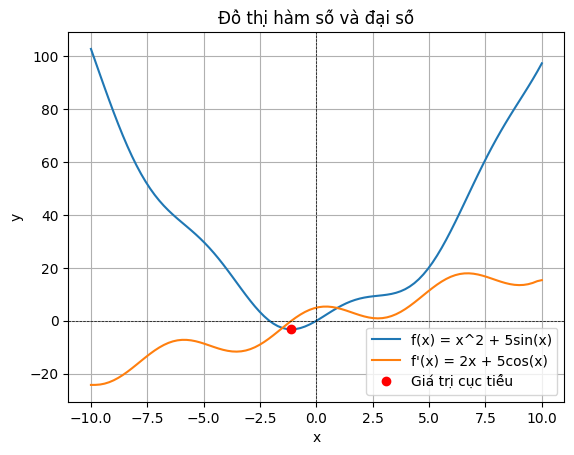

In [3]:
# Vẽ đồ thị cho hàm số grad và y_diff.subs(x, current_point)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = x**2 + 5*np.sin(x)
y_diff = np.gradient(y, x)
plt.plot(x, y, label='f(x) = x^2 + 5sin(x)')
plt.plot(x, y_diff, label="f'(x) = 2x + 5cos(x)")
index = np.abs(x - diem_cuc_tieu).argmin()
plt.plot(diem_cuc_tieu, y[index], 'ro', label='Giá trị cục tiểu')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title('Đồ thị hàm số và đại số')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

,Learning Rate,|f'(x)|,Số bước lặp
0,0.01,0.000023,377
1,0.02,0.000022,187
2,0.03,0.000022,123
3,0.04,0.000018,92
4,0.05,0.000017,73
...,...,...,...
94,0.95,0.000017,73
95,0.96,0.000019,92
96,0.97,0.000022,123
97,0.98,0.000022,187


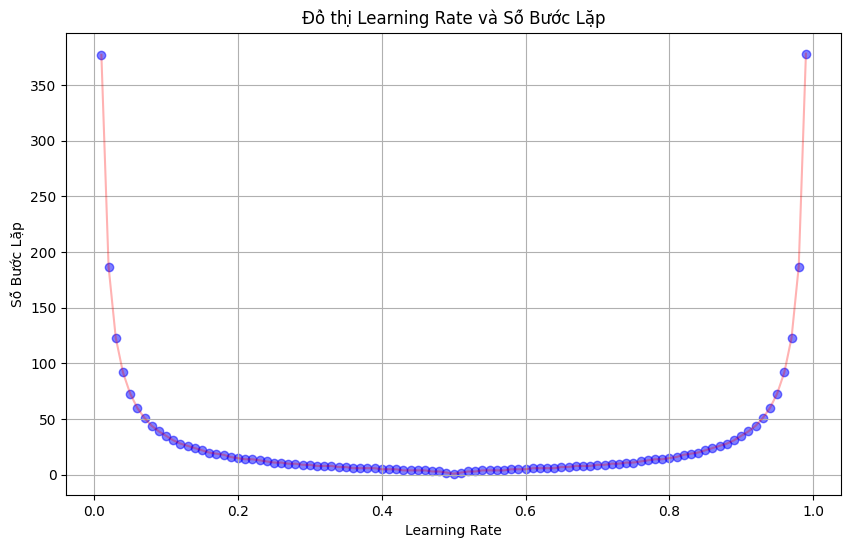

In [4]:
# Bài 2 a,b:
import numpy as np
import pandas as pd
df = pd.DataFrame(columns=['Learning Rate', '|f\'(x)|', 'Số bước lặp'])

for learning_rate in np.arange(0.01, 1, 0.01):
    result = gradient_descent(
        function_f=lambda x: x**2,
        learning_rate=learning_rate,
        initial_point=10,
        max_iterations=10000,
        epsilon=1e-2
    )
    if isinstance(result, tuple):
        gia_tri_dao_ham, gia_tri_cuc_tieu, so_buoc_lap = result
        df.loc[len(df)] = {
            'Learning Rate': learning_rate,
            '|f\'(x)|': gia_tri_dao_ham,
            'Số bước lặp': so_buoc_lap
        }
    else:
        print(f"Gradient descent failed for learning rate {learning_rate}: {result}")
display(df)

# Vẽ đồ thị gồm learning rate và số bước lặp
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Đồ thị Learning Rate và Số Bước Lặp')
plt.xlabel('Learning Rate')
plt.ylabel('Số Bước Lặp')
plt.grid()
plt.scatter(df['Learning Rate'], df['Số bước lặp'], color='blue', alpha=0.5)
plt.plot(df['Learning Rate'], df['Số bước lặp'], color='red', alpha=0.3)
plt.show()

,Điểm bắt đầu,|f'(x)|,Số bước lặp
0,0.0,0.000000,0
1,0.1,0.000023,149
2,0.2,0.000024,183
3,0.3,0.000024,203
4,0.4,0.000024,217
...,...,...,...
95,9.5,0.000024,374
96,9.6,0.000023,375
97,9.7,0.000024,375
98,9.8,0.000023,376


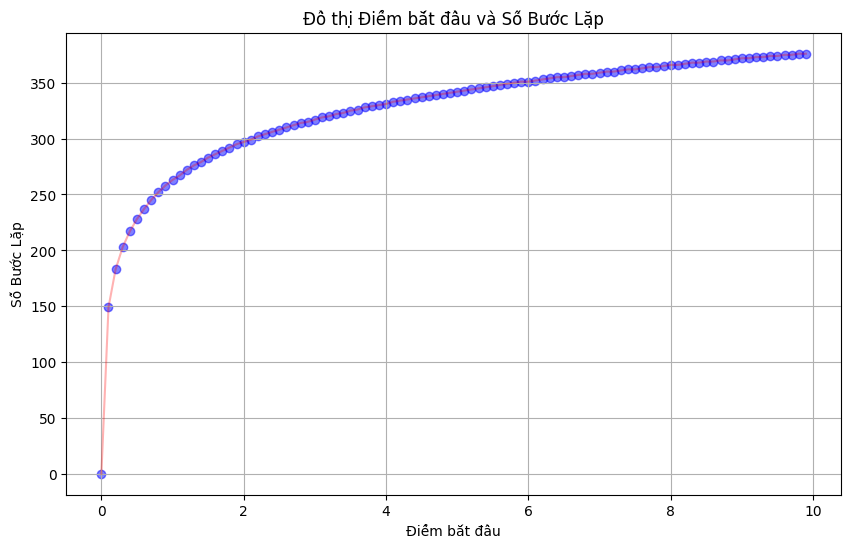

In [5]:
# Bài 2 c:
import numpy as np
import pandas as pd
df1 = pd.DataFrame(columns=['Điểm bắt đầu', '|f\'(x)|', 'Số bước lặp'])
for initial_point in np.arange(0, 10, 0.1):
    result = gradient_descent(
        function_f=lambda x: x**2,
        learning_rate=0.01,
        initial_point=initial_point,
        max_iterations=1000,
        epsilon=1e-2
    )
    if isinstance(result, tuple):
        gia_tri_dao_ham, diem_cuc_tieu, so_buoc_lap = result
        df1.loc[len(df1)] = {
            'Điểm bắt đầu': initial_point,
            '|f\'(x)|': gia_tri_dao_ham,
            'Số bước lặp': so_buoc_lap
        }
    else:
        print(f"Gradient descent failed for learning rate {learning_rate}: {result}")
display(df1)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Đồ thị Điểm bắt đầu và Số Bước Lặp')
plt.xlabel('Điểm bắt đầu')
plt.ylabel('Số Bước Lặp')
plt.grid()
plt.scatter(df1['Điểm bắt đầu'], df1['Số bước lặp'], color='blue', alpha=0.5)
plt.plot(df1['Điểm bắt đầu'], df1['Số bước lặp'], color='red', alpha=0.3)
plt.show()

In [6]:
# Bài 2 d:
import numpy as np

def backtracking_gradient_descent(function_f, grad_f, initial_point, beta=0.5, epsilon=1e-6, max_iterations=1000):
    current_point = initial_point
    for i in range(max_iterations):
        grad = grad_f(current_point)
        norm_grad = np.linalg.norm(grad)
        
        if norm_grad < epsilon:
            print(f"Đã hội tụ sau {i} vòng lặp.")
            break
        
        t = 1  # khởi tạo bước nhảy
        # Backtracking Line Search
        while function_f(current_point - t * grad) > function_f(current_point) - (t / 2) * norm_grad ** 2:
            t *= beta
        
        # Cập nhật x
        current_point = current_point - t * grad
        
    return current_point

# Hàm và đạo hàm
function_f = lambda x: x**2 + 5*np.sin(x)
grad_f = lambda x: 2*x + 5*np.cos(x)

# Gọi thuật toán
x_min = backtracking_gradient_descent(function_f, grad_f, initial_point=10.0)
print("Điểm cực tiểu:", x_min)


Đã hội tụ sau 12 vòng lặp.
Điểm cực tiểu: -1.110510436339639


# Gradient Descent cho hàm nhiều biến

In [7]:
# Bài 3:
from sympy import symbols, diff, Matrix
def gradient_descent_variables(function_f, learning_rate, initial_point, max_iterations, epsilon):   
    x, y = symbols('x y')
    grad = Matrix([diff(function_f, var) for var in [x, y]])
    i = 0
    current_point = initial_point
    while i <= max_iterations:
        grad_values = [float(grad[0].subs({x: current_point[0], y: current_point[1]})), float(grad[1].subs({x: current_point[0], y: current_point[1]}))]
        next_point = [current_point[0] - learning_rate * grad_values[0], current_point[1] - learning_rate * grad_values[1]]
        if np.linalg.norm(grad_values) < epsilon:
            return function_f.subs({x: next_point[0], y: next_point[1]}), next_point[0], next_point[1], i
        current_point = next_point
        i += 1

    return f"Thuật toán không thành công sau {max_iterations} lần lặp", None, None, None
    
x, y = symbols('x y')
gia_tri_cuc_tieu, x, y, so_buoc_lap = gradient_descent_variables(
    function_f=(x**2 + y - 7)**2 + (x - y + 1)**2,
    learning_rate=0.01,
    initial_point=[0, 0],
    max_iterations=1000,
    epsilon=1e-2
)

print(f"Giá trị cực tiếu là: {gia_tri_cuc_tieu}")
print(f"Giá trị của x tại điểm cực tiếu là: {x}")
print(f"Giá trị của y tại điểm cực tiếu là: {y}")
print(f"Thuật toán đã thực hiện số lần lặp là: {so_buoc_lap}")

Giá trị cực tiếu là: 0.0000367185331529386
Giá trị của x tại điểm cực tiếu là: -2.9985802696496164
Giá trị của y tại điểm cực tiếu là: -1.9926301386234926
Thuật toán đã thực hiện số lần lặp là: 516


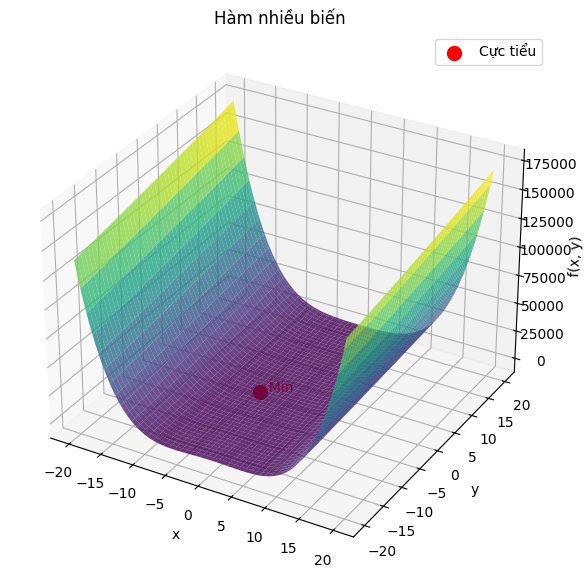

In [8]:
def plot_surface_and_minimum(f, xmin, xmax, ymin, ymax, minimum_point=None, title="Hàm nhiều biến"):
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
        
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Tạo lưới giá trị
    X = np.linspace(xmin, xmax, 100)
    Y = np.linspace(ymin, ymax, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    # Vẽ bề mặt
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

    # Vẽ điểm cực tiểu   
    if minimum_point is not None:
        x_min, y_min = minimum_point
        z_min = f(x_min, y_min)
        ax.scatter(x_min, y_min, z_min, color='red', s=100, label='Cực tiểu')
        ax.text(x_min, y_min, z_min, "  Min", color='red')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Hàm 2 biến
f = lambda x, y: (x**2 + y - 7)**2 + (x - y + 1)**2

# Gọi hàm vẽ với điểm cực tiểu tại (0, 0)
plot_surface_and_minimum(f, xmin=-20, xmax=20, ymin=-20, ymax=20, minimum_point=(x, y))

In [9]:
# Bài 4 a:
x, y = symbols('x y')
gia_tri_cuc_tieu, x, y, so_buoc_lap = gradient_descent_variables(
    function_f=x**2 + y**2,
    learning_rate=0.01,
    initial_point=[1, 1],
    max_iterations=1000,
    epsilon=1e-2
)

print(f"Giá trị cực tiếu là: {gia_tri_cuc_tieu}")
print(f"Giá trị của x tại điểm cực tiếu là: {x}")
print(f"Giá trị của y tại điểm cực tiếu là: {y}")
print(f"Thuật toán đã thực hiện số lần lặp là: {so_buoc_lap}")

Giá trị cực tiếu là: 0.0000234468516076819
Giá trị của x tại điểm cực tiếu là: 0.0034239488611603032
Giá trị của y tại điểm cực tiếu là: 0.0034239488611603032
Thuật toán đã thực hiện số lần lặp là: 280


In [10]:
# Bài 4 b:
import pandas as pd
from sympy import symbols

# Define symbolic variables
x, y = symbols('x y')
function_f = x**2 + y**2  # Define the function as a symbolic expression

df2 = pd.DataFrame(columns=['Learning Rate', 'Đạo hàm', 'Số bước lặp'])
for learning_rate in np.arange(0.1, 1, 0.01):  # Avoid learning_rate = 0 to prevent division by zero
    result = gradient_descent_variables(
        function_f=function_f,
        learning_rate=learning_rate,
        initial_point=[1, 1],
        max_iterations=1000,
        epsilon=1e-2
    )
    if isinstance(result, tuple):
        gia_tri_cuc_tieu, x_val, y_val, so_buoc_lap = result
        df2.loc[len(df2)] = {
            'Learning Rate': learning_rate,
            'Đạo hàm': gia_tri_cuc_tieu,
            'Số bước lặp': so_buoc_lap
        }
    else:
        print(f"Gradient descent failed for learning rate {learning_rate}: {result}")

display(df2)

,Learning Rate,Đạo hàm,Số bước lặp
0,0.10,1.16920130986472e-5,26
1,0.11,1.32303375554440e-5,23
2,0.12,1.13979843418254e-5,21
3,0.13,1.17570613632557e-5,19
4,0.14,7.57992415438833e-6,18
...,...,...,...
85,0.95,1.85227742619935e-5,54
86,0.96,2.01256617536916e-5,68
87,0.97,2.00821758287713e-5,92
88,0.98,2.17257734607237e-5,139


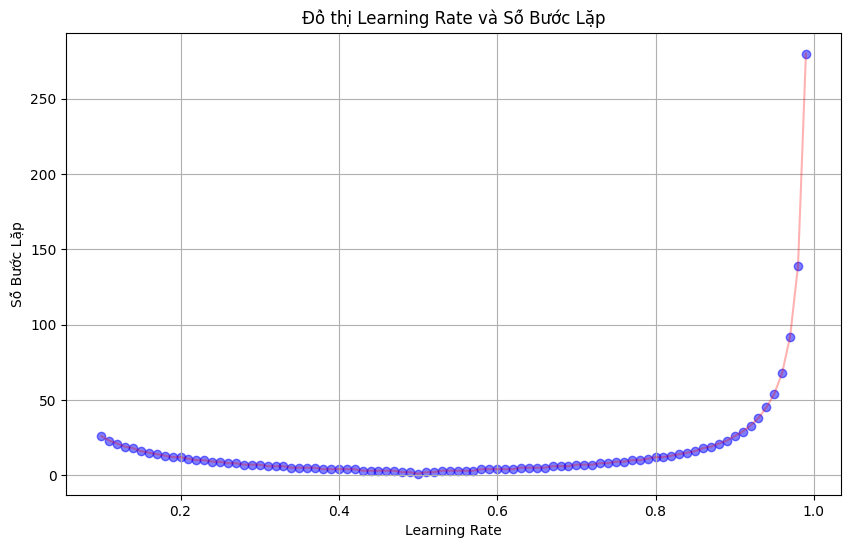

In [11]:
# Vẽ đồ thị gồm learning rate và số bước lặp
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Đồ thị Learning Rate và Số Bước Lặp')
plt.xlabel('Learning Rate')
plt.ylabel('Số Bước Lặp')
plt.grid()
plt.scatter(df2['Learning Rate'], df2['Số bước lặp'], color='blue', alpha=0.5)
plt.plot(df2['Learning Rate'], df2['Số bước lặp'], color='red', alpha=0.3)
plt.show()

# Accelerated Gradient Descent

In [12]:
import numpy as np

def gradient(f, x, eps=1e-8):
    grad = np.zeros_like(x)
    fx = f(x)
    for i in range(len(x)):
        dx = np.zeros_like(x)
        dx[i] = eps
        grad[i] = (f(x + dx) - fx) / eps
    return grad

def accelerated_gradient_descent(f, x0, lr, N, tol):
    x_prev = np.copy(x0)
    x = np.copy(x0)
    i = 0

    while i <= N - 1:
        y = x + (i - 1) / (i + 2) * (x - x_prev)      
        grad_y = gradient(f, y)
        x_next = y - lr * grad_y

        if np.linalg.norm(gradient(f, x_next)) < tol:
            return x_next

        x_prev = x
        x = x_next
        i += 1

    return x

f = lambda x: (x[0]**2 + x[1] - 7)**2 + (x[0] - x[1] + 1)**2

x0 = np.array([0, 0])
x_min, success = accelerated_gradient_descent(f, x0, lr=0.015, N=1000, tol=1e-3)

print("Nghiệm gần đúng:", x_min)


Nghiệm gần đúng: -2.9998812889419706


# Stochastic Gradient Descent

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('tuoi_hatt.csv')
print(df.head())
# Chuyển dữ liệu từ DataFrame về numpy arrays
# Inspect column names to ensure correct usage
print(df.columns)

# Use the correct column names
a = df['Tuổi'].values.reshape(-1, 1)  # đặc trưng (feature)
b = df['HATT'].values  # nhãn (label)

# Thêm bias term vào a (thành [x, 1] để học cả hệ số chặn)
a_bias = np.hstack([a, np.ones_like(a)])

# Tạo danh sách loss function f_i và gradient tương ứng cho SGD
f_list = []
grad_list = []

for i in range(len(a)):
    ai = a_bias[i]
    bi = b[i]
    f_i = lambda x, ai=ai, bi=bi: 0.5 * (np.dot(ai, x) - bi)**2
    grad_i = lambda x, ai=ai, bi=bi: ai * (np.dot(ai, x) - bi)
    f_list.append(f_i)
    grad_list.append(grad_i)

# Hàm SGD đã định nghĩa trước đó
def stochastic_gradient_descent(f_list, grad_list, x0, eta, N, epsilon=1e-6):
    m = len(f_list)
    x = np.copy(x0)
    
    for i in range(N):
        idx = np.random.randint(0, m)
        grad = grad_list[idx](x)
        x_new = x - eta * grad

        full_grad = np.sum([g(x_new) for g in grad_list], axis=0) / m
        if np.linalg.norm(full_grad) < epsilon:
            return x_new, True

        x = x_new

    return x, False

# Gọi hàm SGD với vector khởi tạo x0 = [0, 0]
x0 = np.zeros(a_bias.shape[1])
x_result, success = stochastic_gradient_descent(f_list, grad_list, x0, eta=0.001, N=5000)

x_result, success


   STT  Tuổi  HATT
0    1     39   144
1    2     36   136
2    3     45   138
3    4     47   145
4    5     65   162
Index(['STT', 'Tuổi', 'HATT'], dtype='object')


(array([-2.69734658e+263,  2.49021498e+262]), False)

In [14]:
# Dự đoán tuổi khi biết huyết áp tâm thu
X = df["HATT"].values.reshape(-1, 1)
y = df['Tuổi'].values

X_bias = np.hstack([X, np.ones_like(X)])

f_list_age = []
grad_list_age = []

for i in range(len(X_bias)):
    xi = X_bias[i]
    yi = y[i]
    f_i = lambda w, xi=xi, yi=yi: 0.5 * (np.dot(xi, w) - yi)**2
    grad_i = lambda w, xi=xi, yi=yi: xi * (np.dot(xi, w) - yi)
    f_list_age.append(f_i)
    grad_list_age.append(grad_i)

w0 = np.zeros(X_bias.shape[1])
w_result, success_age = stochastic_gradient_descent(f_list_age, grad_list_age, w0, eta=0.00001, N=5000)
HATT = 150
age = w_result[0]*HATT-w_result[1]
print(age)

47.867099597648824


In [15]:
# Dự đoán huyết áp tâm thu khi biết tuổi
X2 = df["Tuổi"].values.reshape(-1, 1)  # input: Tuổi
y2 = df["HATT"].values  # output: HATT

# Thêm bias vào input
X2_bias = np.hstack([X2, np.ones_like(X2)])

# Tạo danh sách hàm mất mát và gradient
f_list_bp = []
grad_list_bp = []

for i in range(len(X2_bias)):
    xi = X2_bias[i]
    yi = y2[i]
    f_i = lambda w, xi=xi, yi=yi: 0.5 * (np.dot(xi, w) - yi)**2
    grad_i = lambda w, xi=xi, yi=yi: xi * (np.dot(xi, w) - yi)
    f_list_bp.append(f_i)
    grad_list_bp.append(grad_i)

# Vector trọng số khởi tạo
w0_bp = np.zeros(X2_bias.shape[1])

# Chạy SGD để huấn luyện mô hình dự đoán HATT từ tuổi
w_result_bp, success_bp = stochastic_gradient_descent(f_list_bp, grad_list_bp, w0_bp, eta=0.00001, N=5000)

w_result_bp, success_bp
tuoi_test = 50
hatt_du_doan = w_result_bp[0] * tuoi_test + w_result_bp[1]
print(f"Dự đoán HATT cho người {tuoi_test} tuổi:", hatt_du_doan)

Dự đoán HATT cho người 50 tuổi: 142.7904116217423
